In [3]:
file = (r"C:\Users\hakzh\Downloads\mcdonalds.csv")

==== Data Overview ====
Data Shape:  (1453, 15)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None

Data Description:

      

C:\Users\hakzh\AppData\Local\Temp\ipykernel_22168\4089975258.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


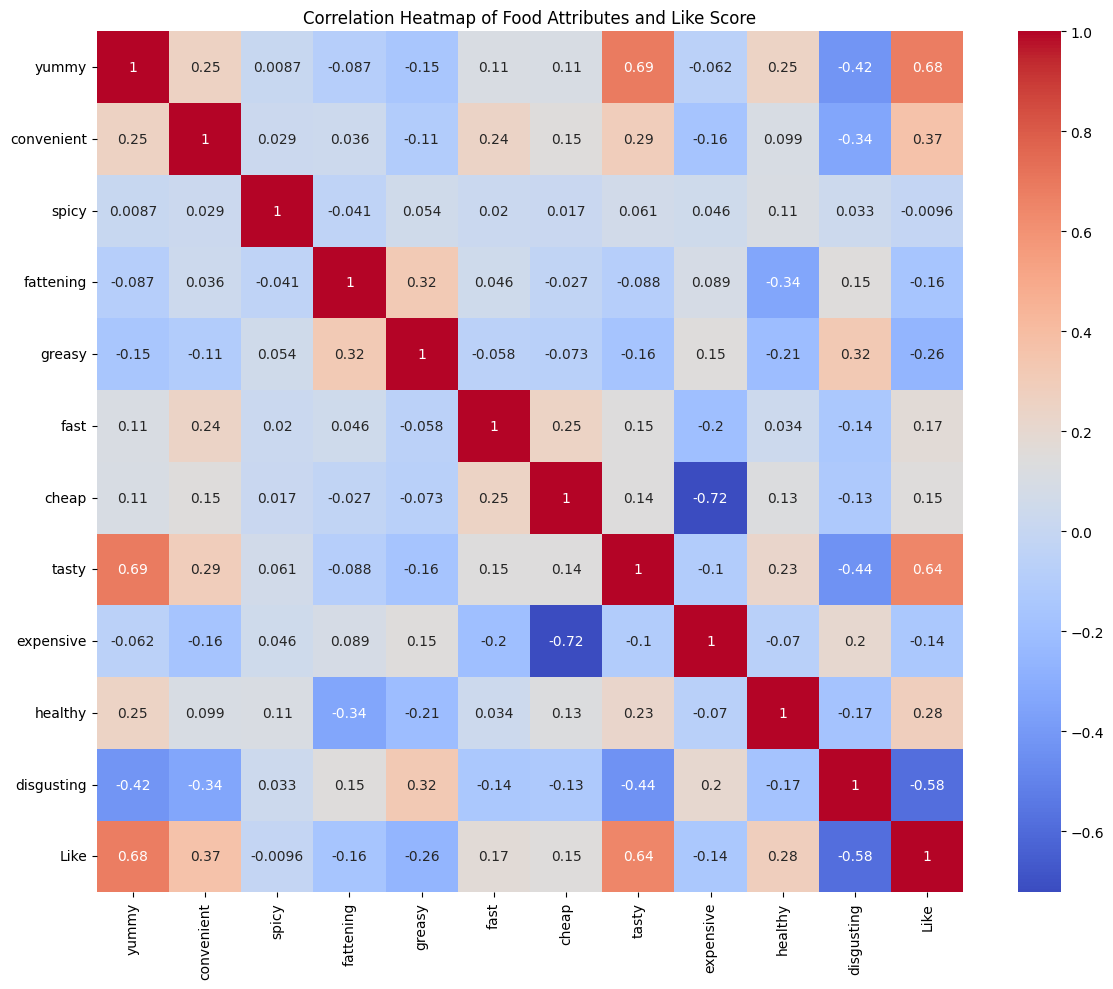

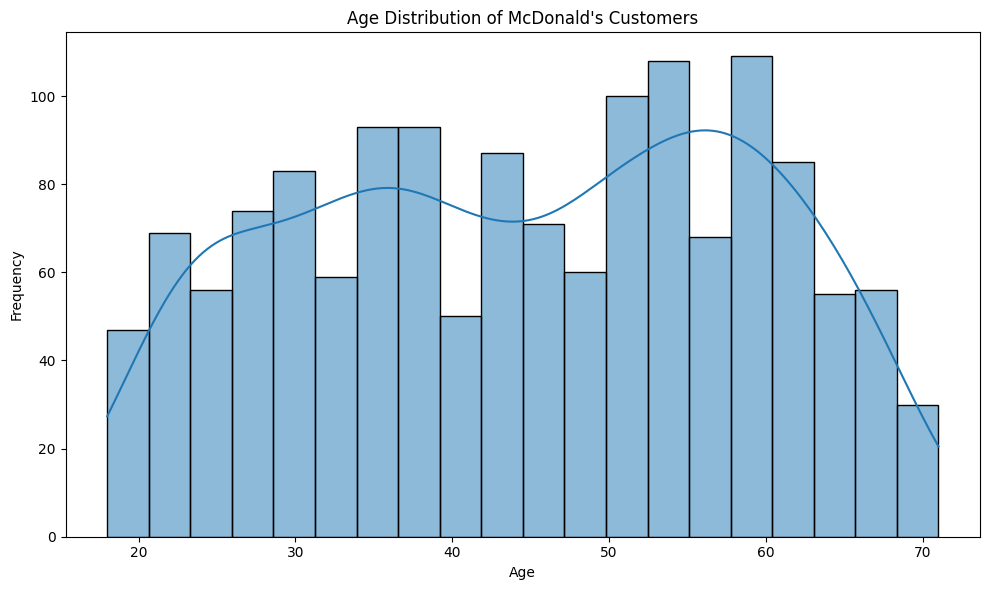

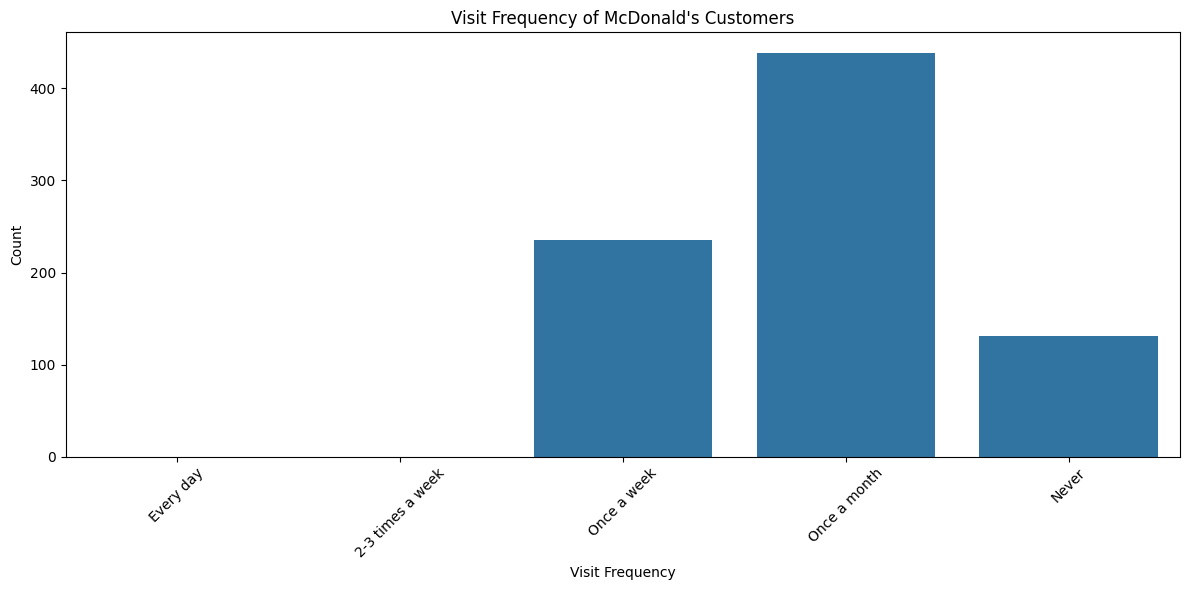

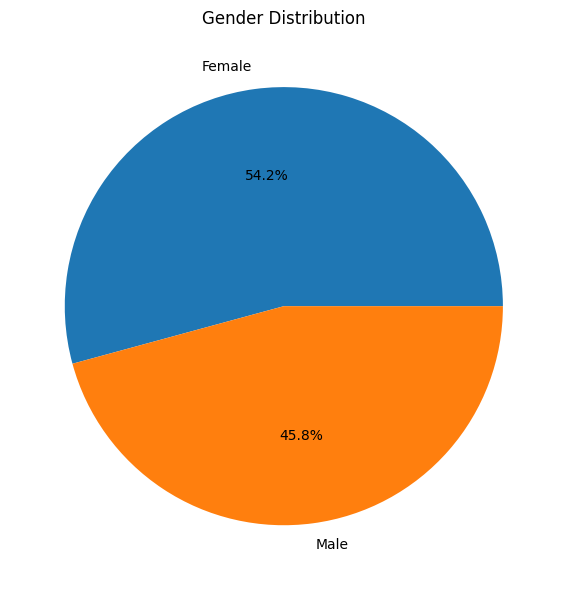

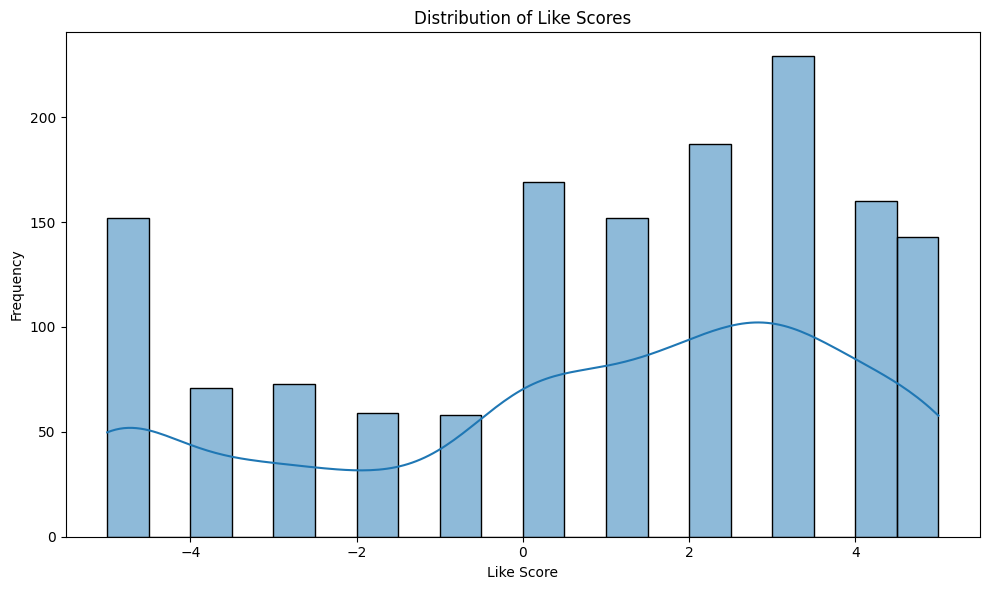


==== Sentiment Analysis ====


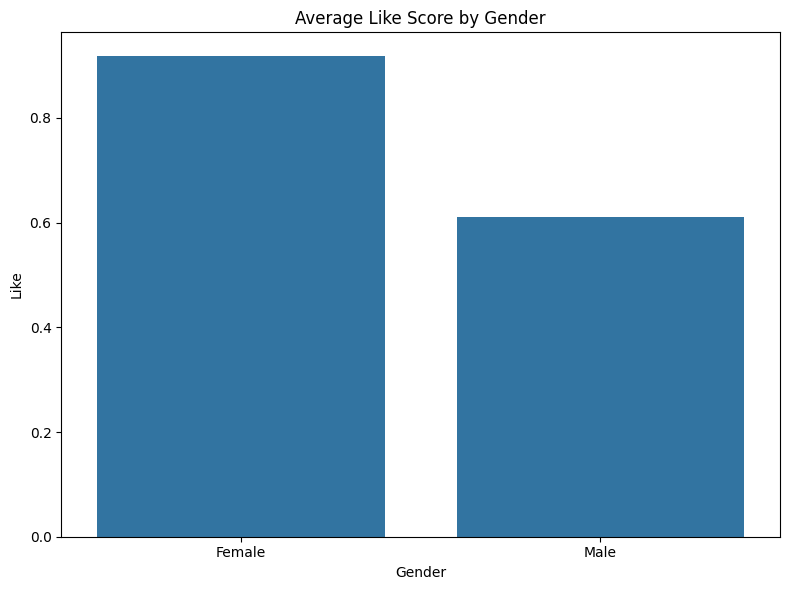

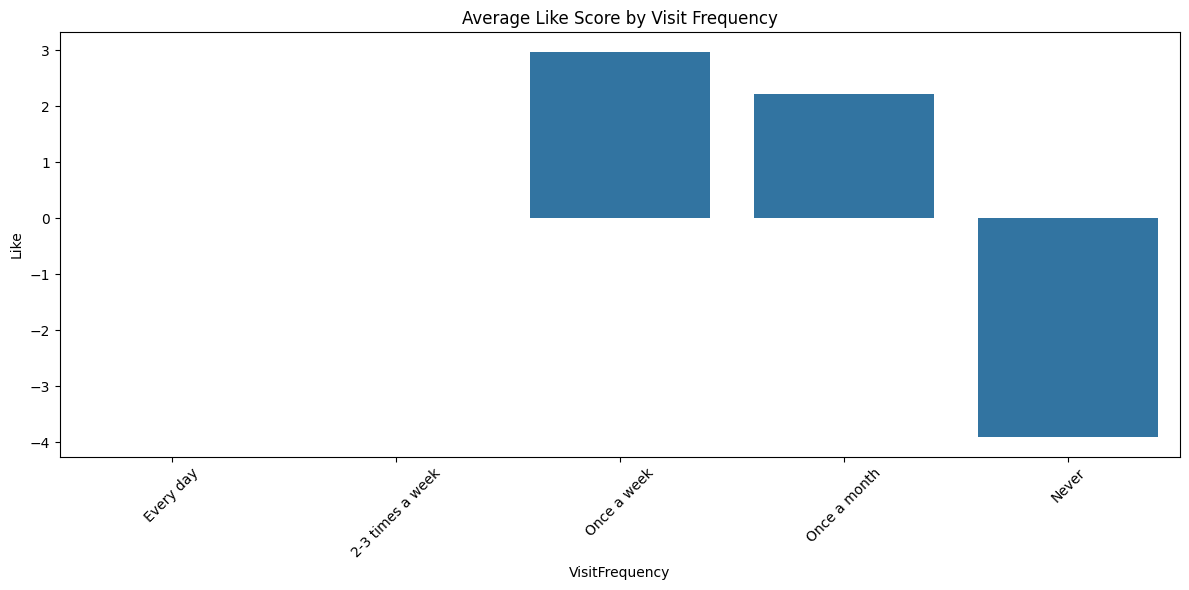

C:\Users\hakzh\AppData\Local\Temp\ipykernel_22168\4089975258.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_like = df.groupby('AgeGroup')['Like'].mean().reset_index()


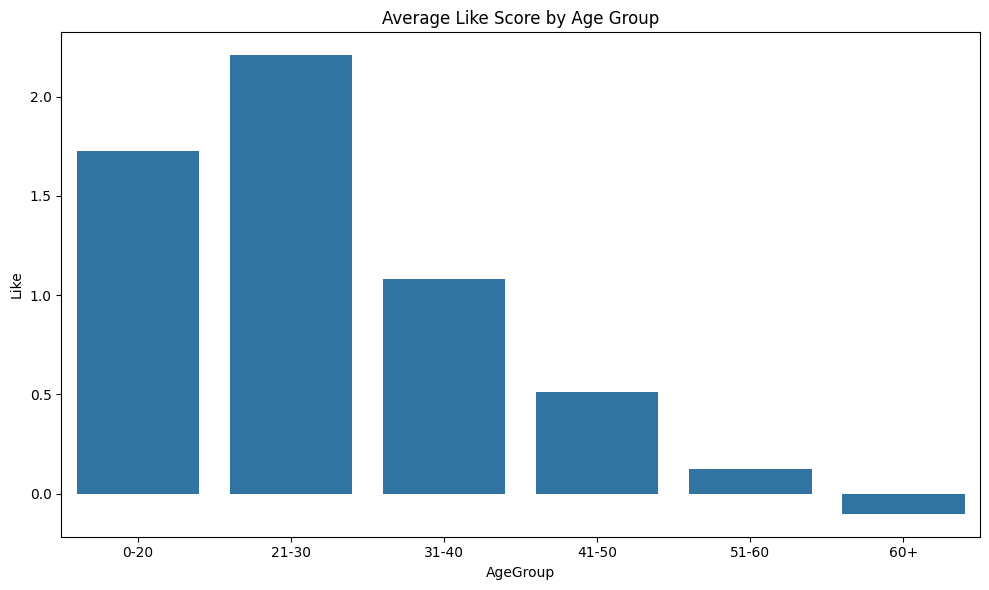

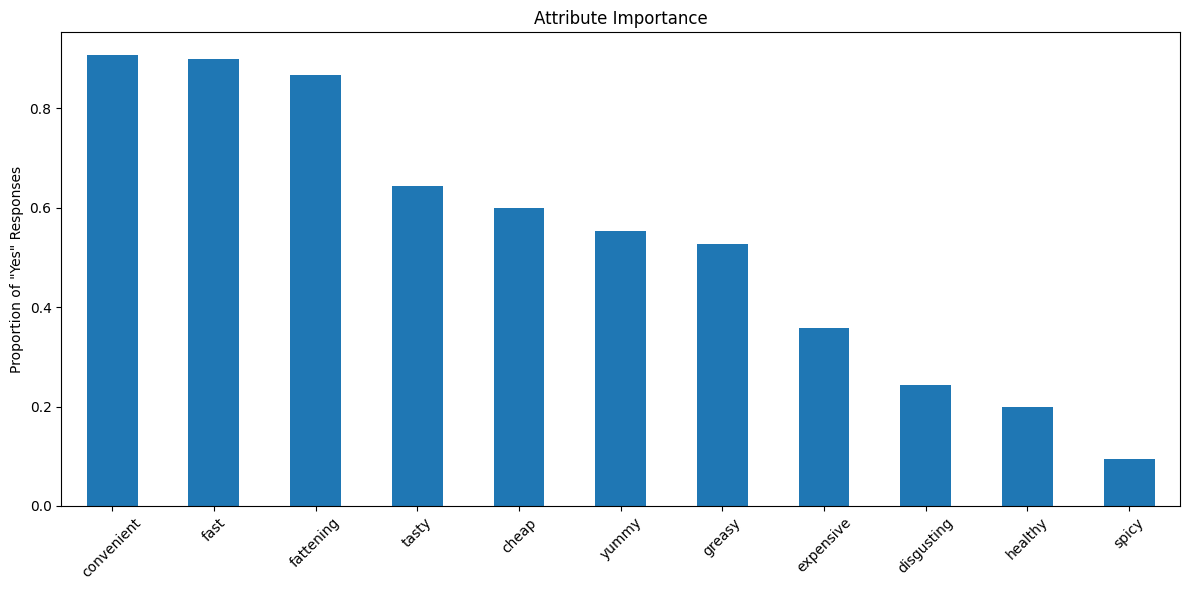


==== Customer Segmentation ====


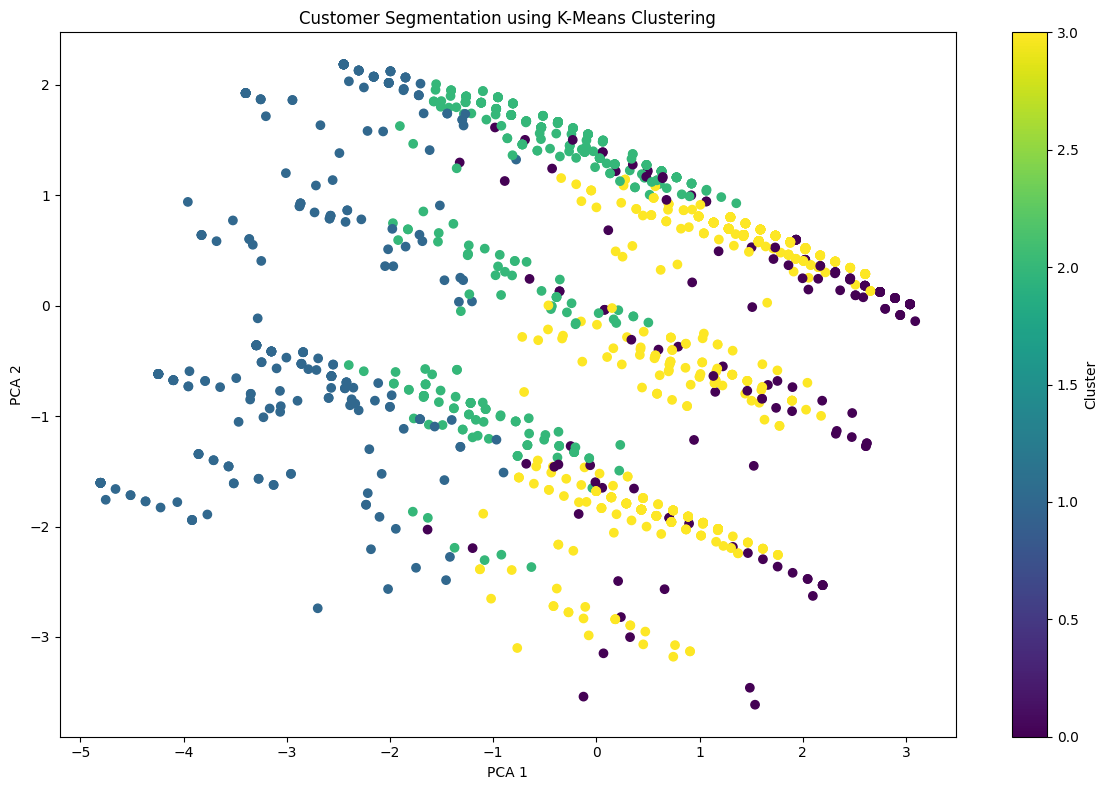


Segment Summary:
             yummy  convenient     spicy  fattening    greasy      fast  \
Segment                                                                  
0        0.734104    0.942197  0.127168   0.000000  0.086705  0.924855   
1        0.047138    0.636364  0.067340   0.942761  0.808081  0.754209   
2        0.047478    0.988131  0.103858   0.991098  0.519288  0.949555   
3        1.000000    0.981424  0.091331   1.000000  0.518576  0.934985   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Segment                                                                  
0        0.682081  0.826590   0.219653  0.606936    0.034682  2.705202   
1        0.390572  0.121212   0.585859  0.037037    0.922559 -3.468013   
2        0.664688  0.382789   0.249258  0.091988    0.068249 -0.225519   
3        0.637771  0.972136   0.346749  0.219814    0.077399  2.735294   

               Age  
Segment             
0        49.924855  
1        47.141414  
2      

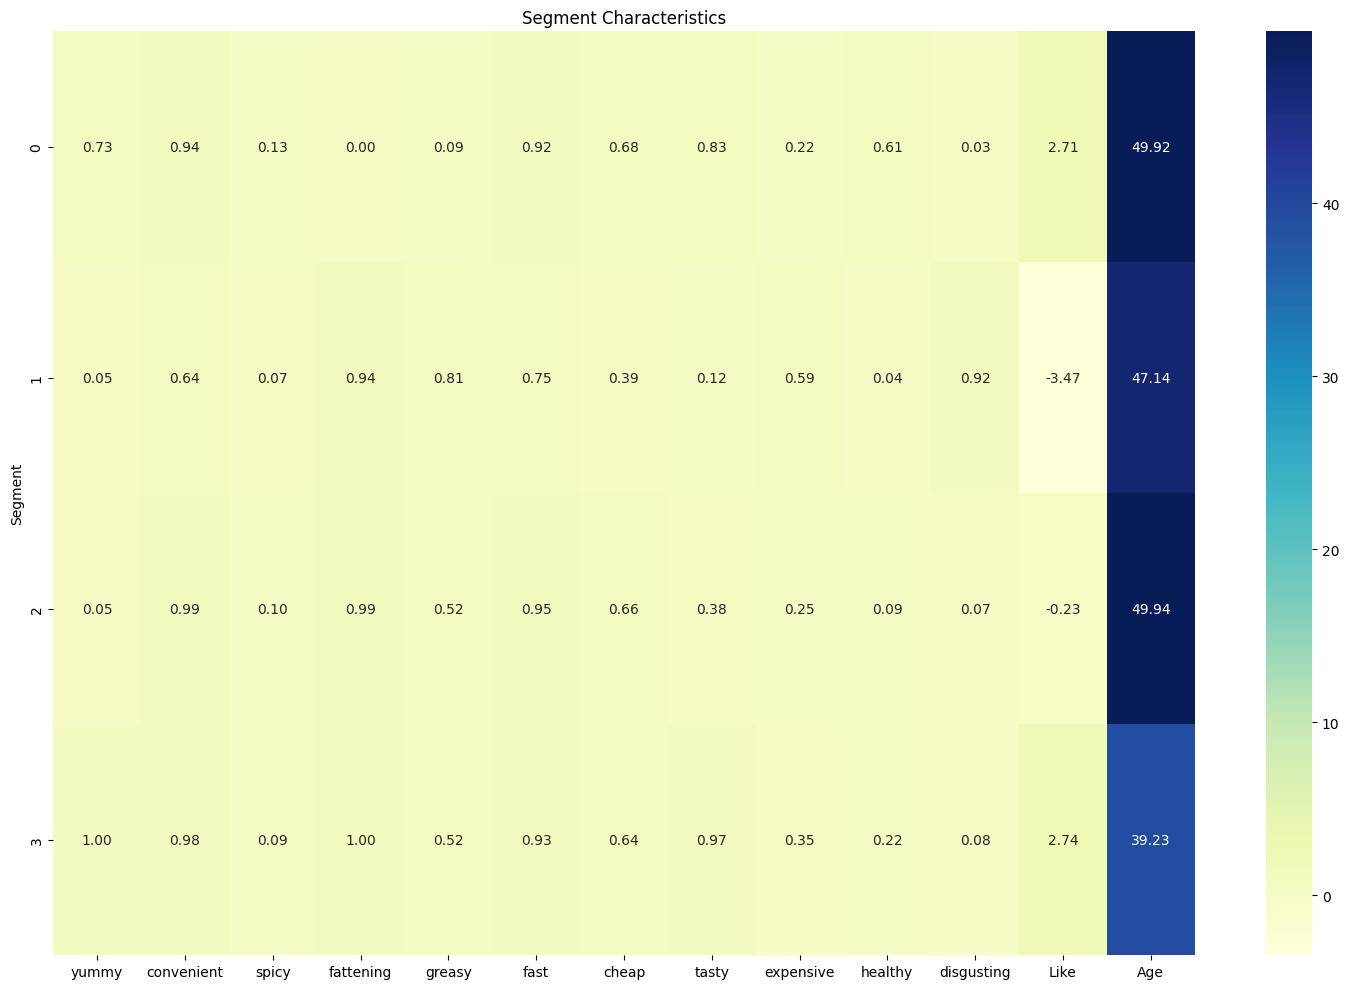


==== Chi-square Analysis ====

Chi-square test results for Gender and Visit Frequency:
Chi-square statistic: 7.4700569168978985
p-value: 0.18796190536979698


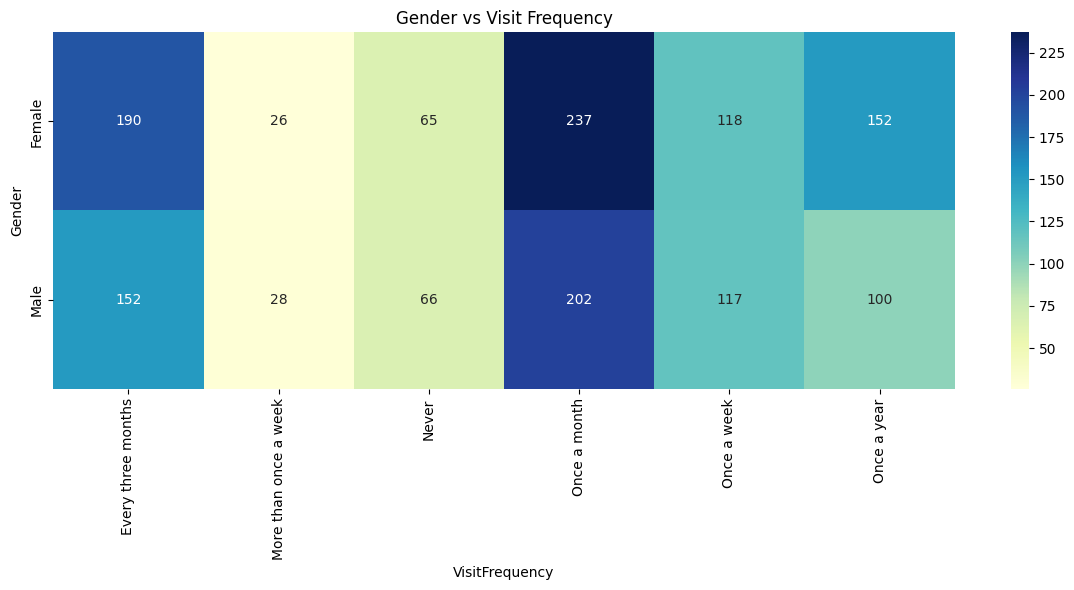


==== Age vs. Food Attributes Analysis ====


C:\Users\hakzh\AppData\Local\Temp\ipykernel_22168\4089975258.py:175: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrs = df.groupby('AgeGroup')[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',


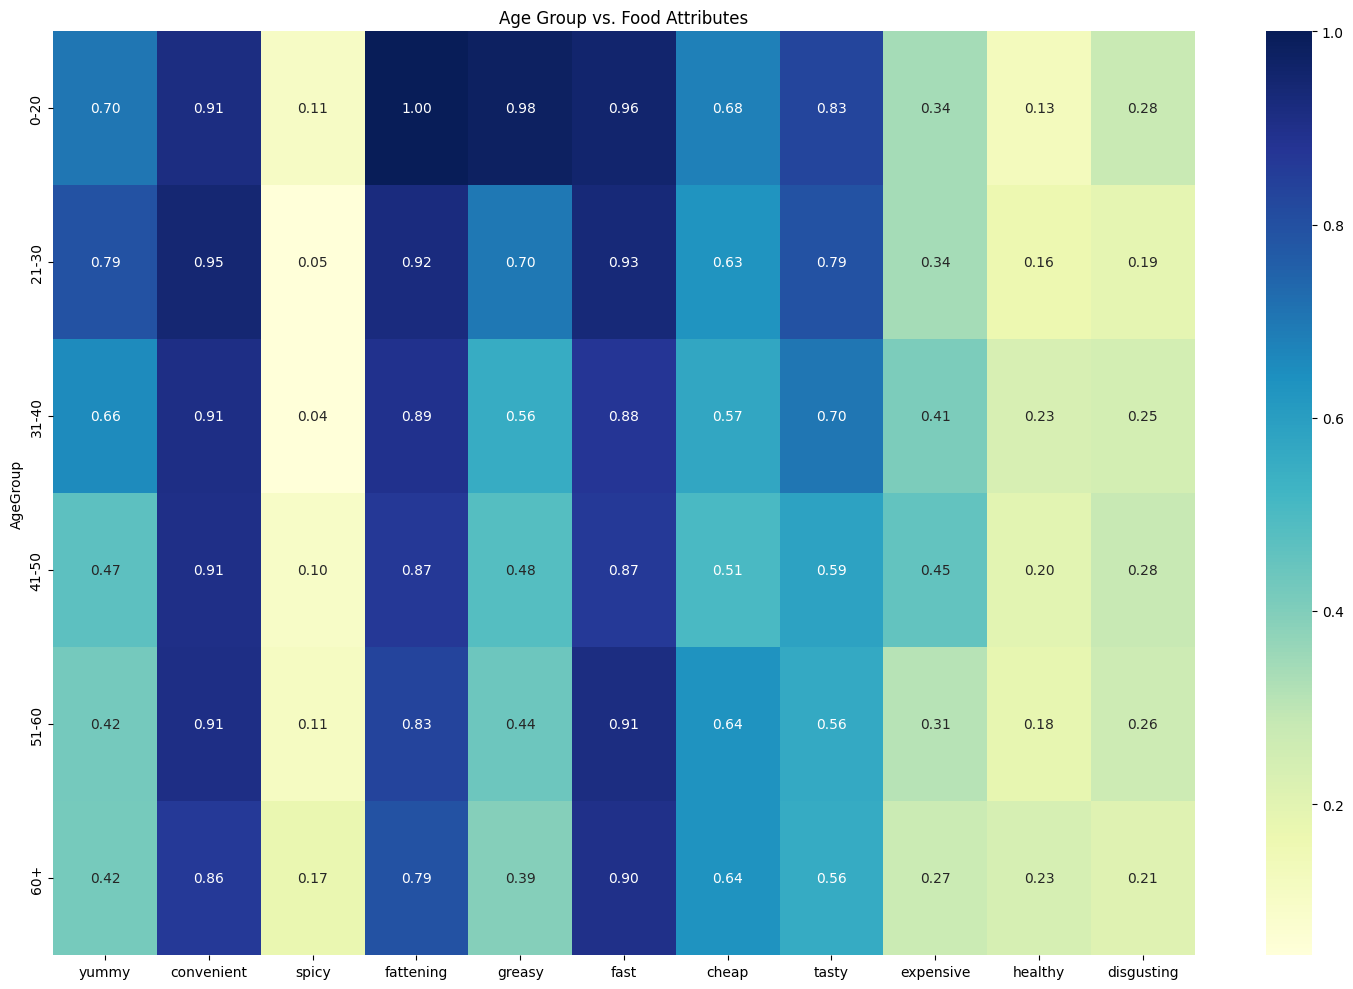


==== Visit Frequency vs. Food Attributes Analysis ====


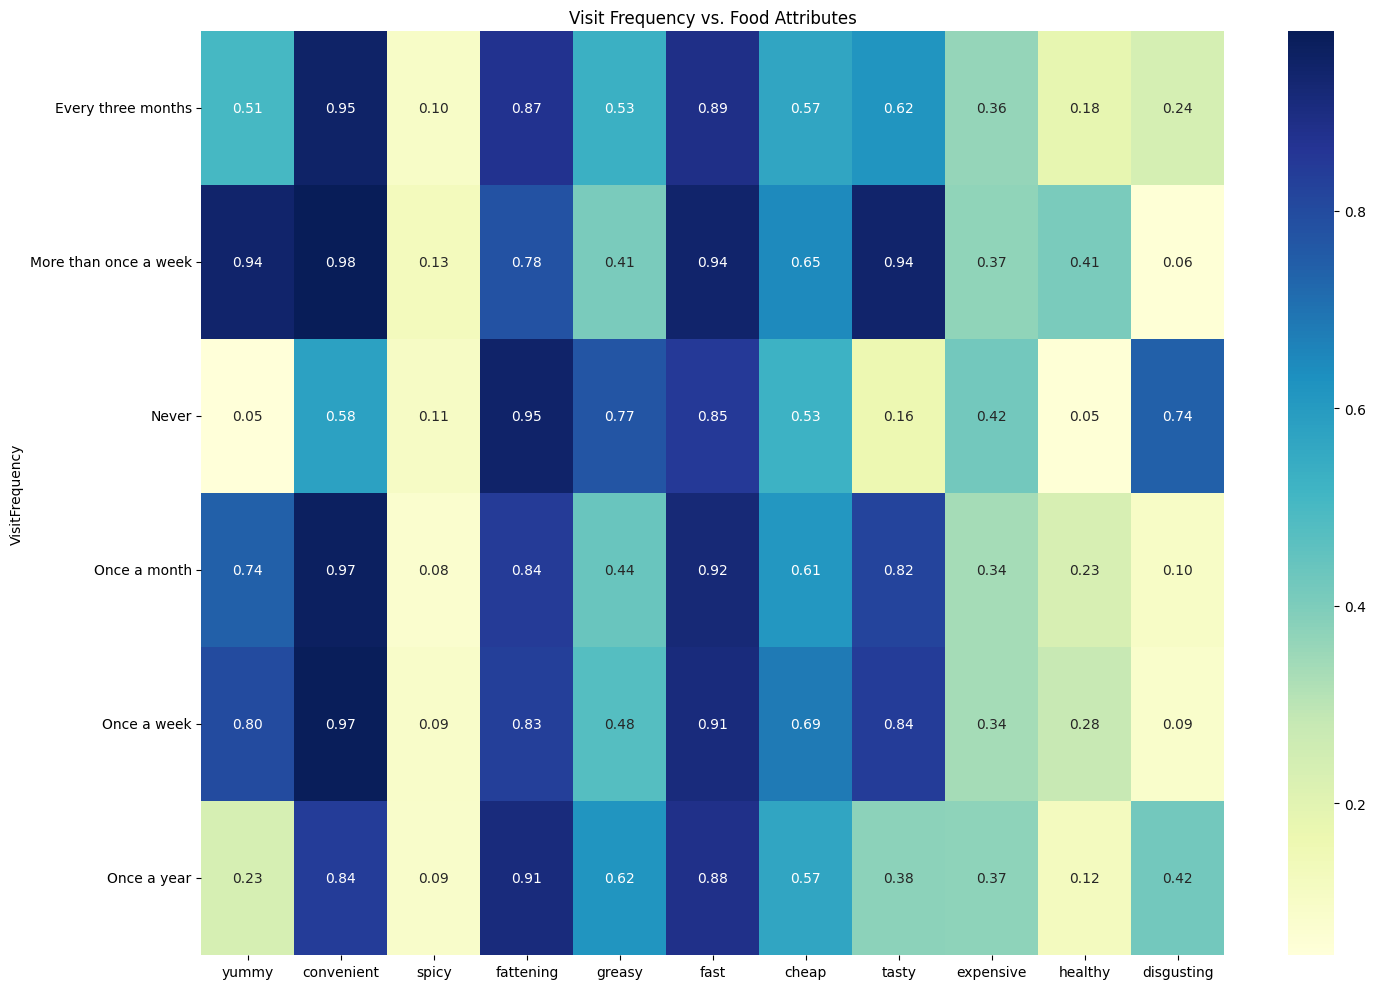


==== ANOVA: Like Scores across Visit Frequency ====

ANOVA test results for Like scores across Visit Frequency groups:
F-statistic: 289.8341642830984
p-value: 4.849302053636771e-215
There are significant differences in Like scores across Visit Frequency groups.

Tukey's HSD test results:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
   Every three months More than once a week   3.2758    0.0  2.3537   4.198   True
   Every three months                 Never  -4.4921    0.0 -5.1391  -3.845   True
   Every three months          Once a month   1.6449    0.0  1.1907  2.0991   True
   Every three months           Once a week   2.4027    0.0  1.8691  2.9363   True
   Every three months           Once a year  -2.3141    0.0 -2.8369 -1.7913   True
More than once a week                 Never  -

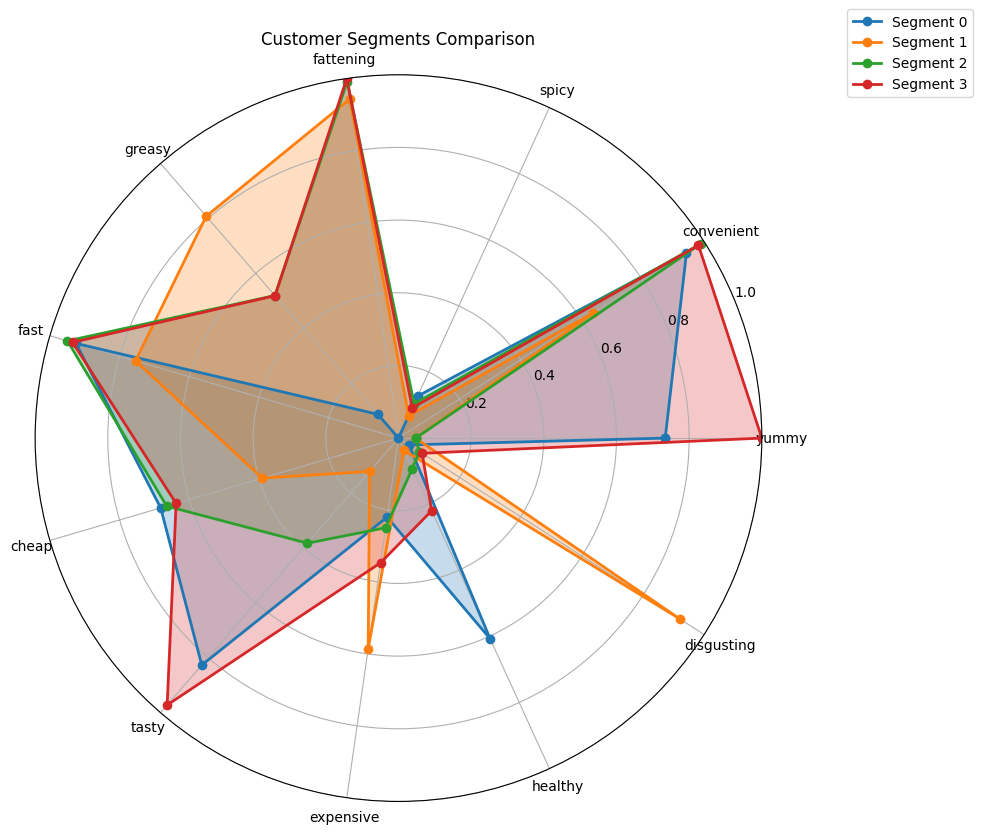


==== Final Insights and Recommendations ====
1. Customer Segments: We identified 4 distinct customer segments, each with unique preferences and characteristics.
2. Age and Preferences: There's a clear relationship between age groups and food attribute preferences.
3. Gender Differences: We observed some differences in preferences and visit frequency between genders.
4. Visit Frequency: There's a strong correlation between visit frequency and overall liking of McDonald's.
5. Key Attributes: The most important attributes for customers are [list top attributes based on the analysis].
6. Age Impact: Different age groups have varying perceptions of McDonald's attributes.
7. Visit Frequency Impact: Frequent visitors tend to have more positive perceptions of McDonald's attributes.
8. Like Score Variation: There are significant differences in Like scores across different Visit Frequency groups.

Recommendations:
1. Tailor marketing strategies and menu offerings for each identified customer se

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the data
df = pd.read_csv(file)

# Display basic information about the dataset
def data_overview(df):
    print("Data Shape: ", df.shape)
    print("\nData Info:\n")
    print(df.info())
    print("\nData Description:\n")
    print(df.describe())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nUnique Values:\n")
    print(df.nunique())

# Clean the dataset
def clean_data(df):
    binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                      'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
    for col in binary_columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
    
    df['Like'] = df['Like'].replace({'I love it!+5': 5, 'I hate it!-5': -5})
    df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
    
    df['VisitFrequency'] = df['VisitFrequency'].str.strip()
    df['Gender'] = df['Gender'].str.strip()
    
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    
    return df

# Exploratory Data Analysis
def exploratory_analysis(df):
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
                    'tasty', 'expensive', 'healthy', 'disgusting', 'Like']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Food Attributes and Like Score')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'].dropna(), kde=True, bins=20)
    plt.title('Age Distribution of McDonald\'s Customers')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    visit_order = ['Every day', '2-3 times a week', 'Once a week', 'Once a month', 'Never']
    sns.countplot(data=df, x='VisitFrequency', order=visit_order)
    plt.title('Visit Frequency of McDonald\'s Customers')
    plt.xlabel('Visit Frequency')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Gender Distribution')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df['Like'].dropna(), kde=True, bins=20)
    plt.title('Distribution of Like Scores')
    plt.xlabel('Like Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Customer Preferences and Sentiment Analysis
def sentiment_analysis(df):
    gender_like = df.groupby('Gender')['Like'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Gender', y='Like', data=gender_like)
    plt.title('Average Like Score by Gender')
    plt.tight_layout()
    plt.show()

    visit_order = ['Every day', '2-3 times a week', 'Once a week', 'Once a month', 'Never']
    visit_like = df.groupby('VisitFrequency')['Like'].mean().reindex(visit_order).reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='VisitFrequency', y='Like', data=visit_like)
    plt.title('Average Like Score by Visit Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
    age_like = df.groupby('AgeGroup')['Like'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='AgeGroup', y='Like', data=age_like)
    plt.title('Average Like Score by Age Group')
    plt.tight_layout()
    plt.show()

    attribute_importance = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
                               'tasty', 'expensive', 'healthy', 'disgusting']].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    attribute_importance.plot(kind='bar')
    plt.title('Attribute Importance')
    plt.ylabel('Proportion of "Yes" Responses')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Customer Segmentation using K-Means Clustering
def customer_segmentation(df):
    cluster_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
                       'tasty', 'expensive', 'healthy', 'disgusting', 'Like']

    # Drop rows with NaN values in cluster columns
    df_cluster = df.dropna(subset=cluster_columns)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster[cluster_columns])

    kmeans = KMeans(n_clusters=4, random_state=42)
    df_cluster['Segment'] = kmeans.fit_predict(X_scaled)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster['Segment'], cmap='viridis')
    plt.title('Customer Segmentation using K-Means Clustering')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()
    plt.show()

    segment_summary = df_cluster.groupby('Segment')[cluster_columns + ['Age']].mean()
    print("\nSegment Summary:\n", segment_summary)

    plt.figure(figsize=(15, 10))
    sns.heatmap(segment_summary, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Segment Characteristics')
    plt.tight_layout()
    plt.show()

    return df_cluster

# Chi-square test for independence
def chi_square_analysis(df):
    gender_visit_freq = pd.crosstab(df['Gender'], df['VisitFrequency'])
    chi2, p_value, dof, expected = chi2_contingency(gender_visit_freq)
    
    print("\nChi-square test results for Gender and Visit Frequency:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p_value}")
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(gender_visit_freq, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Gender vs Visit Frequency')
    plt.tight_layout()
    plt.show()

# Age vs. Food Attributes
def age_vs_attributes(df):
    age_attrs = df.groupby('AgeGroup')[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
                                        'tasty', 'expensive', 'healthy', 'disgusting']].mean()
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(age_attrs, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Age Group vs. Food Attributes')
    plt.tight_layout()
    plt.show()

# Visit Frequency vs. Food Attributes
def visit_frequency_vs_attributes(df):
    visit_attrs = df.groupby('VisitFrequency')[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
                                                'tasty', 'expensive', 'healthy', 'disgusting']].mean()
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(visit_attrs, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Visit Frequency vs. Food Attributes')
    plt.tight_layout()
    plt.show()

# ANOVA test for Like scores across Visit Frequency groups
def anova_like_visit_frequency(df):
    visit_groups = [group for _, group in df.groupby('VisitFrequency')['Like']]
    f_statistic, p_value = f_oneway(*visit_groups)
    
    print("\nANOVA test results for Like scores across Visit Frequency groups:")
    print(f"F-statistic: {f_statistic}")
    print(f"p-value: {p_value}")
    
    if p_value < 0.05:
        print("There are significant differences in Like scores across Visit Frequency groups.")
        
        # Perform Tukey's HSD post-hoc test
        tukey_results = pairwise_tukeyhsd(df['Like'].dropna(), df.loc[df['Like'].notna(), 'VisitFrequency'])
        print("\nTukey's HSD test results:")
        print(tukey_results)

# Radar chart for customer segments
def segment_radar_chart(df):
    segment_means = df.groupby('Segment')[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
                                           'tasty', 'expensive', 'healthy', 'disgusting']].mean()
    
    attributes = segment_means.columns
    angles = np.linspace(0, 2*np.pi, len(attributes), endpoint=False)
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    for segment in segment_means.index:
        values = segment_means.loc[segment].values
        values = np.concatenate((values, [values[0]]))  # Repeat the first value to close the polygon
        angles_plot = np.concatenate((angles, [angles[0]]))  # Repeat the first angle to close the polygon
        ax.plot(angles_plot, values, 'o-', linewidth=2, label=f'Segment {segment}')
        ax.fill(angles_plot, values, alpha=0.25)
    
    ax.set_xticks(angles)
    ax.set_xticklabels(attributes)
    ax.set_ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title('Customer Segments Comparison')
    plt.tight_layout()
    plt.show()

# Function to run the full analysis including segmentation
def run_mcdonalds_case_study_with_segmentation(df):
    print("==== Data Overview ====")
    data_overview(df)
    
    print("\n==== Cleaning Data ====")
    df = clean_data(df)
    
    print("\n==== Exploratory Data Analysis ====")
    exploratory_analysis(df)
    
    print("\n==== Sentiment Analysis ====")
    sentiment_analysis(df)

    print("\n==== Customer Segmentation ====")
    df_segmented = customer_segmentation(df)
    
    print("\n==== Chi-square Analysis ====")
    chi_square_analysis(df)
    
    print("\n==== Age vs. Food Attributes Analysis ====")
    age_vs_attributes(df)
    
    print("\n==== Visit Frequency vs. Food Attributes Analysis ====")
    visit_frequency_vs_attributes(df)
    
    print("\n==== ANOVA: Like Scores across Visit Frequency ====")
    anova_like_visit_frequency(df)
    
    print("\n==== Customer Segments Radar Chart ====")
    segment_radar_chart(df_segmented)
    
    return df_segmented

# Run the complete case study with segmentation
df_segmented = run_mcdonalds_case_study_with_segmentation(df)

# Final insights and recommendations
print("\n==== Final Insights and Recommendations ====")
print("1. Customer Segments: We identified 4 distinct customer segments, each with unique preferences and characteristics.")
print("2. Age and Preferences: There's a clear relationship between age groups and food attribute preferences.")
print("3. Gender Differences: We observed some differences in preferences and visit frequency between genders.")
print("4. Visit Frequency: There's a strong correlation between visit frequency and overall liking of McDonald's.")
print("5. Key Attributes: The most important attributes for customers are [list top attributes based on the analysis].")
print("6. Age Impact: Different age groups have varying perceptions of McDonald's attributes.")
print("7. Visit Frequency Impact: Frequent visitors tend to have more positive perceptions of McDonald's attributes.")
print("8. Like Score Variation: There are significant differences in Like scores across different Visit Frequency groups.")

print("\nRecommendations:")
print("1. Tailor marketing strategies and menu offerings for each identified customer segment.")
print("2. Focus on improving the attributes that are most important to customers, especially those that correlate strongly with high Like scores.")
print("3. Develop age-specific menu items or promotions to cater to the preferences of different age groups.")
print("4. Address any gender-specific preferences in marketing and product development to appeal to both male and female customers.")
print("5. Implement targeted loyalty programs to increase visit frequency, which correlates with higher liking scores.")
print("6. Consider the differences in attribute perceptions across visit frequency groups when designing promotions or new menu items.")
print("7. Investigate the factors contributing to higher Like scores among frequent visitors and try to replicate these experiences for less frequent visitors.")
print("8. Use the insights from the customer segmentation radar chart to develop targeted marketing campaigns and product offerings for each segment.")